In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import pathlib

In [2]:
data, col_headers = [], []
for csv_path in sorted(glob.glob("./*.csv")):
    path_obj = pathlib.Path(csv_path)
    csv_name, exp = path_obj.name, path_obj.stem
    df = pd.read_csv(csv_path)
    data.append(df["acc"])
    col_headers.append("_".join(exp.split("_")[1:4]))

In [3]:
data = pd.concat(data, axis=1)
data.columns = col_headers
data


,5_epochs,baseline_pretrained_resnet18,baseline_random_resnet18,canny_dual_pretrained,canny_dual_random,canny_single_pretrained,canny_single_random,dexined_dual_pretrained,dexined_dual_random,dexined_single_pretrained,dexined_single_random
0,0.841500,0.789750,0.699000,0.381875,0.350625,0.207000,0.249875,0.749250,0.707625,0.679875,0.619625
1,0.800000,0.137000,0.171250,0.377375,0.349125,0.127250,0.246750,0.192375,0.247625,0.083500,0.172000
2,0.764125,0.058625,0.061375,0.372875,0.348375,0.084250,0.243625,0.088125,0.107875,0.028875,0.050125
3,0.729500,0.044000,0.032250,0.369750,0.347625,0.058375,0.240625,0.054375,0.056875,0.018250,0.018000
4,0.704000,0.040875,0.019375,0.366875,0.346750,0.042750,0.237250,0.038875,0.035375,0.015250,0.007875
5,0.682250,0.043000,0.015250,0.364125,0.345500,0.032125,0.234875,0.031875,0.022875,0.014625,0.005375


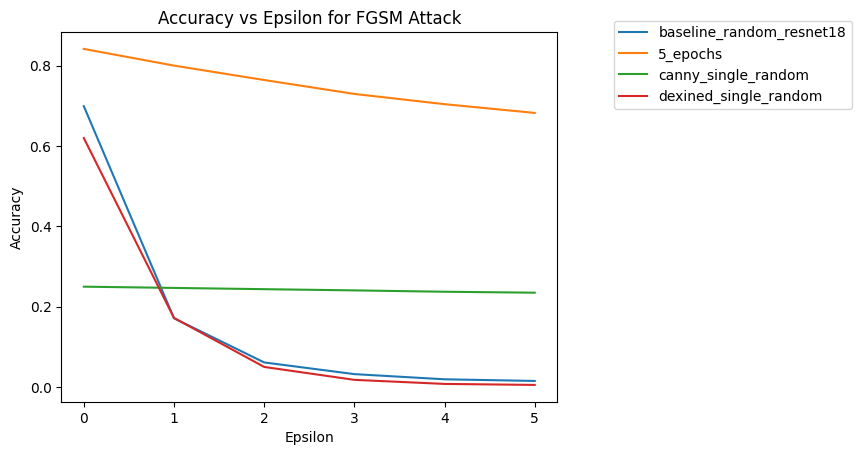

In [4]:
selected_data = data[[
    "baseline_random_resnet18",
    "5_epochs",
    "canny_single_random",
    "dexined_single_random",
]]

selected_data.plot()
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epsilon for FGSM Attack")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig("./plots/adv_standard.png", bbox_inches="tight")

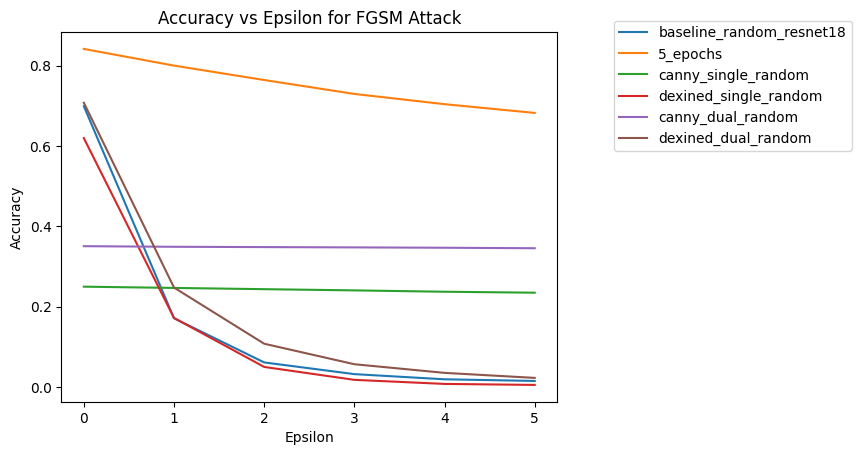

In [5]:
selected_data = data[[
    "baseline_random_resnet18",
    "5_epochs",
    "canny_single_random",
    "dexined_single_random",
    "canny_dual_random",
    "dexined_dual_random",
]]

selected_data.plot()
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epsilon for FGSM Attack")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig("./plots/adv_ablation.png", bbox_inches="tight")